# Train the golded Model

### Import Modules

In [2]:
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import torch
from torch.distributions import Normal
import matplotlib.pyplot as plt
import numpy as np
from dataset import GoldGenerator
from model import Model

## 1) Load data

In [3]:
dataset = GoldGenerator()
dataloader = DataLoader(dataset=dataset, shuffle=True, batch_size=16)
print(f"X Shape: {dataset[0][0].shape}\nY Shape: {dataset[0][0].shape}")

X Shape: torch.Size([100, 3])
Y Shape: torch.Size([100, 3])


In [4]:
print(dataset[2][1])

tensor([[ 0.0000e+00, -7.8180e-01],
        [ 0.0000e+00, -5.1236e-01],
        [ 0.0000e+00,  6.9766e-01],
        [ 0.0000e+00,  1.5385e+00],
        [ 0.0000e+00,  1.3011e+00],
        [ 0.0000e+00,  1.7623e+00],
        [ 0.0000e+00, -1.7260e-01],
        [ 0.0000e+00,  1.3441e+00],
        [ 0.0000e+00,  1.0762e+00],
        [ 0.0000e+00, -1.8835e-01],
        [ 0.0000e+00, -1.0250e+00],
        [ 0.0000e+00,  5.8245e-01],
        [ 0.0000e+00,  1.2797e+00],
        [ 0.0000e+00, -4.9239e-01],
        [ 0.0000e+00,  1.5113e+00],
        [ 0.0000e+00,  3.8769e-01],
        [ 0.0000e+00,  9.9386e-01],
        [ 0.0000e+00,  9.5959e-01],
        [ 0.0000e+00, -1.0613e+00],
        [ 0.0000e+00,  1.2238e+00],
        [ 0.0000e+00, -1.5515e-02],
        [ 0.0000e+00,  7.1771e-01],
        [ 0.0000e+00, -2.1276e-01],
        [ 0.0000e+00,  1.5806e+00],
        [ 0.0000e+00,  2.5056e-01],
        [ 0.0000e+00,  1.1789e+00],
        [ 0.0000e+00, -1.6940e-03],
        [ 0.0000e+00,  1.302

## 2) Train Model

In [5]:
model = Model(generate_gif=True)

In [6]:
trainer = Trainer(max_epochs=50)
trainer.fit(model,
            dataloader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:307: LightningDeprecationWarning: The `LightningModule.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `LightningModule.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 274   
------------------------------------
274       Trainable params
0         Non-trainable params
274       Total params
0.001     Total estimated model params size (MB)
/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` arg

Training: 0it [00:00, ?it/s]

GIF DONE


<Figure size 432x288 with 0 Axes>

## 3) Training Loss

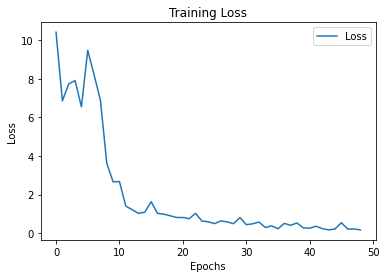

In [7]:
# plot loss
plt.plot(model.total_loss, label="Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

## 4) Likelihood Ratio

torch.Size([100, 3])
torch.Size([100, 1])


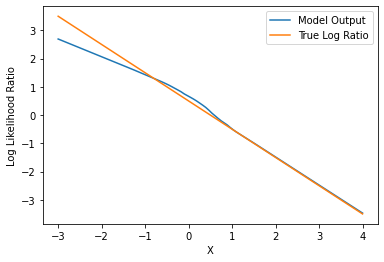

In [8]:
# test model performance
size = 100
X = torch.empty((size, 3))
X[:, 0] = torch.linspace(-3, 4, size)
X[:, 1] = torch.zeros(size)
X[:, 2] = torch.ones(size)

output = model(X).detach().numpy()

true_log_ratio = Normal(loc=0, scale=1).log_prob(X[:, 0]) - Normal(loc=1, scale=1).log_prob(X[:, 0]) # maybe combined likelihood here?

plt.plot(X[:, 0].detach().numpy(), output, label="Model Output")
plt.plot(X[:, 0].detach().numpy(), true_log_ratio.detach().numpy(), label="True Log Ratio")
plt.legend()
plt.xlabel("X")
plt.ylabel("Log Likelihood Ratio")
plt.show()



### Gaussians

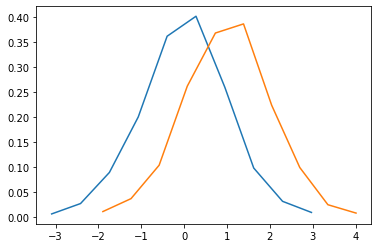

In [9]:
g0 = Normal(loc=0, scale=1).rsample((1000,))
g1 = Normal(loc=1, scale=1).rsample((1000,))

x0, bins_0 = np.histogram(g0, bins=10, density=True)
x1, bins_1 = np.histogram(g1, bins=10, density=True)

bins_centralized_0 = (bins_0[:-1] + bins_0[1:])/2
bins_centralized_1 = (bins_1[:-1] + bins_1[1:])/2
plt.plot(bins_centralized_0, x0)
plt.plot(bins_centralized_1, x1)